In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Test statistic is a basis of comparision between the what the hypothesis predict
and what we actually we observed. 
p_value = the probability of observing a test statistic equally or more extreme than the one you observed, given that 
the null hypothesis is true.


In [11]:
'''
Dataset used in this exploratory analysis is available in 
https://datadryad.org/resource/doi:10.5061/dryad.g6g3h
'''

df = pd.read_csv('beak_depth_1975_2012.txt', sep=' ')
'''
we have beak depth data for 1975 and 2012. Lets do ecdf plotting for both
1975 and 2012 and see if we can find any difference in their beak-depth
'''

_beak1975 = df.loc[df['year'] == 1975, ['beak_depth']].values.ravel()
_beak2012 = df.loc[df['year'] == 2012, ['beak_depth']].values.ravel()

# write a function for ecdf
def cal_ecdf(values):
    x_axis = np.sort(values)
    y_axis = np.arange(1, len(values) + 1) / len(values)
    
    return x_axis, y_axis

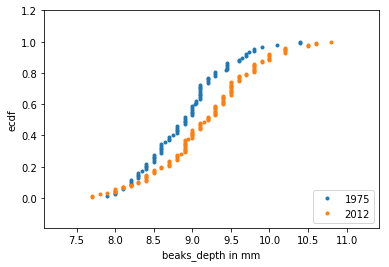

In [12]:
x_1975, y_1975 = cal_ecdf(_beak1975)
x_2012, y_2012 = cal_ecdf(_beak2012)

plt.plot(x_1975, y_1975, marker='.', linestyle = 'none')
plt.plot(x_2012, y_2012, marker ='.', linestyle = 'none')
plt.margins(0.20)
plt.xlabel('beaks_depth in mm')
plt.ylabel('ecdf')
plt.legend(('1975', '2012'), loc='lower right')
plt.show()


From above graph, we can see there is clearly a difference between 1975 and 2012
beak depth. 2012 beak_depth is more variant and also mean value looks higher. Lets
validate this using further exploratory analysis. 

I am considering hypothesis that, both the mean from 1975 and 2012 for 
a beak_depth is equal. There is no change and difference we see in the above
ecdf is because simply due to the random value. Lets try to prove this. 

In [4]:
overall_mean = df['beak_depth'].mean()

# we have overall mean now, lets try to shift values for 1975 and 2012 in 
# such a way that, both of these values have same mean

_beak1975_shifted = _beak1975 - np.mean(_beak1975) + overall_mean
_beak2012_shifted = _beak2012 - np.mean(_beak2012) + overall_mean

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def calculate_bootstrap(data, function, arraysize):
    replicates = np.zeros(arraysize)
    
    for i in range(arraysize):
        replicates[i] = bootstrap_replicate_1d(data, function)
    
    return replicates


In [10]:
# lets do bootstrap replicates for 5000 times for these recently created shifted values
# using function above

replicated_1975 = calculate_bootstrap(_beak1975_shifted, np.mean, 5000)
replicated_2012 = calculate_bootstrap(_beak2012_shifted, np.mean, 5000)

# difference in replicated bootstrap values mean 
replicated_diff = (replicated_2012 - replicated_1975)

original_meandf = np.mean(_beak2012) - np.mean(_beak1975)

# caculate p_value
p_value = np.sum(replicated_diff >= original_meandf) / len(replicated_diff)

print('p_value is:',  p_value)


p_value is: 0.0008


Our initial hypothesis was There is no change and difference in the beak_depths. We see those
change in ECDF because of simply random values.

However, We get very small p-values which makes it clearer that we should reject our initial hypothesis.
This gives a clear indication that, there is significant change in the beak_depth. 